In [28]:
#Clasificadores
#Preprocesamiento

In [3]:
#MODULOS NECESARIOS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Cargar el conjunto de datos
data = sns.load_dataset('iris')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#Resumen de datos
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Distribucion de cada clase
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [7]:
#Carga de bibliotecas especificas pasra modelos de IA
from sklearn.model_selection import train_test_split
#pip install sklearn

In [8]:
# Separacion de datos en grupo de Entrenamiento y prueba
train, test = train_test_split(data, test_size = 0.4, stratify=data['species'], random_state=19)
train.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
68,6.2,2.2,4.5,1.5,versicolor
0,5.1,3.5,1.4,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
108,6.7,2.5,5.8,1.8,virginica
14,5.8,4.0,1.2,0.2,setosa
24,4.8,3.4,1.9,0.2,setosa
18,5.7,3.8,1.7,0.3,setosa
20,5.4,3.4,1.7,0.2,setosa
118,7.7,2.6,6.9,2.3,virginica


In [9]:
#Analisis exploratorio
#Histogramas para observar la distribucion de los 4 atributos

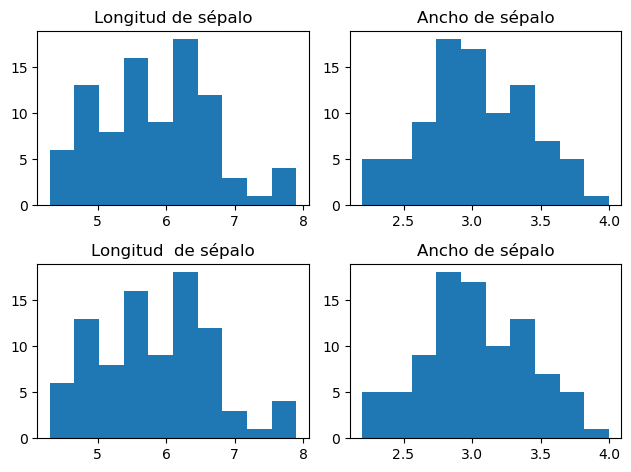

In [10]:
n_bins = 10
fig, axs = plt.subplots(2,2)
axs[0,0].hist(train['sepal_length'], bins=n_bins)
axs[0,0].set_title('Longitud de sépalo')
axs[0,1].hist(train['sepal_width'], bins=n_bins)
axs[0,1].set_title('Ancho de sépalo')
axs[1,0].hist(train['sepal_length'], bins=n_bins)
axs[1,0].set_title('Longitud  de sépalo')
axs[1,1].hist(train['sepal_width'], bins=n_bins)
axs[1,1].set_title('Ancho de sépalo')
fig.tight_layout(pad=1.0);

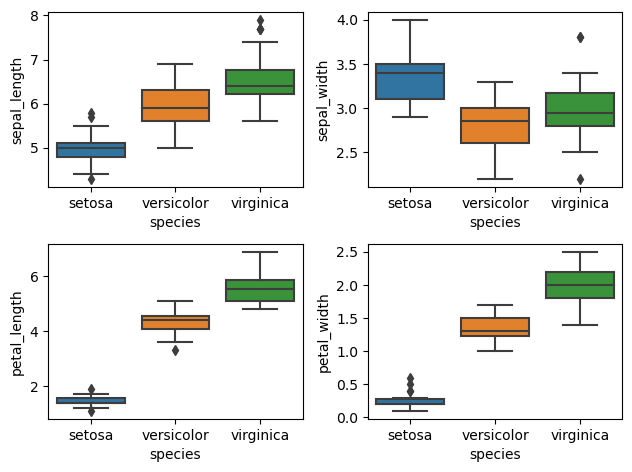

In [11]:
#Diagramas Box-plot
fn = ['sepal_length','sepal_width','petal_length','petal_width']
cn = ['setosa', 'versicolor','virginica']
fig, axs = plt.subplots(2,2)
sns.boxplot(x='species', y = fn[0], data=train, order=cn, ax=axs[0,0])
sns.boxplot(x='species', y = fn[1], data=train, order=cn, ax=axs[0,1])
sns.boxplot(x='species', y = fn[2], data=train, order=cn, ax=axs[1,0])
sns.boxplot(x='species', y = fn[3], data=train, order=cn, ax=axs[1,1])
fig.tight_layout(pad=1.0);

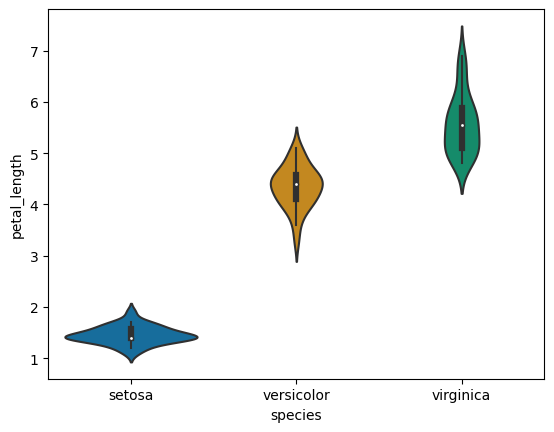

In [12]:
#Diagramas de Violin
sns.violinplot(x='species', y=fn[2], data=train, size=5, order=cn, palette='colorblind');

C:\Users\jenif\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


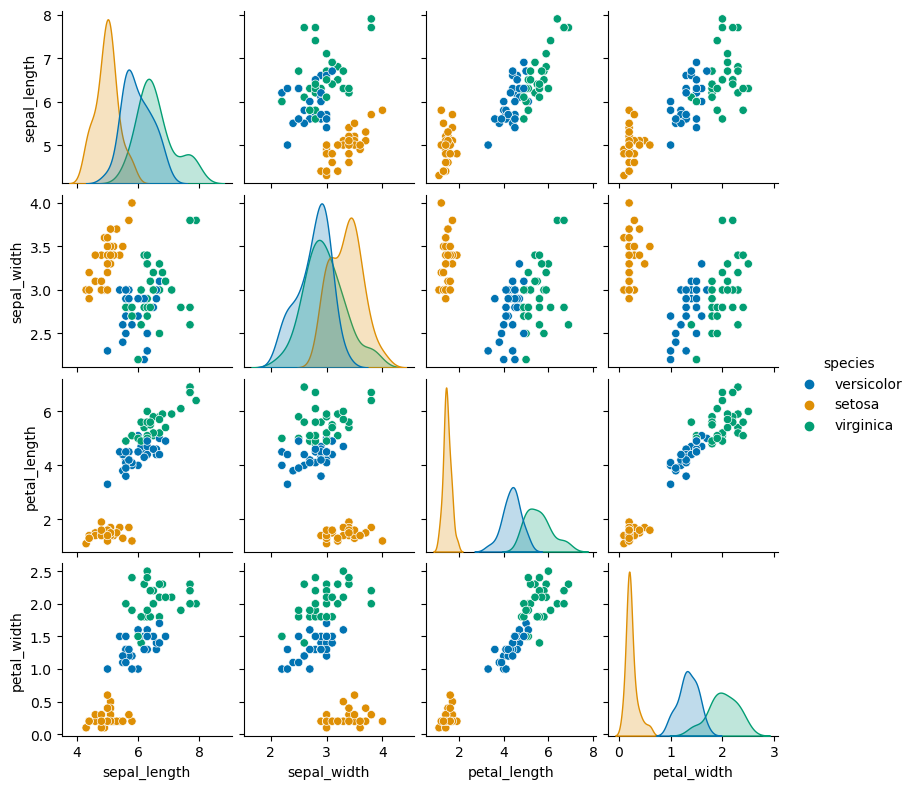

In [13]:
#Diagrama de dispersion de atributos emparejados
sns.pairplot(train, hue='species', height=2, palette='colorblind');

In [14]:
#Matriz de correlación
corrmat = train.corr(numeric_only = True)
corrmat

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.170714,0.881815,0.828909
sepal_width,-0.170714,1.000000,-0.427169,-0.352479
petal_length,0.881815,-0.427169,1.000000,0.964360
petal_width,0.828909,-0.352479,0.964360,1.000000


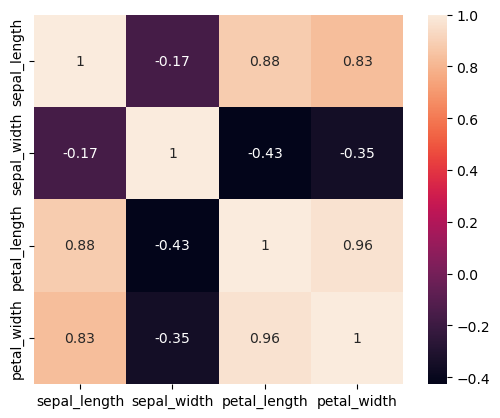

In [15]:
sns.heatmap(corrmat, annot=True, square=True);

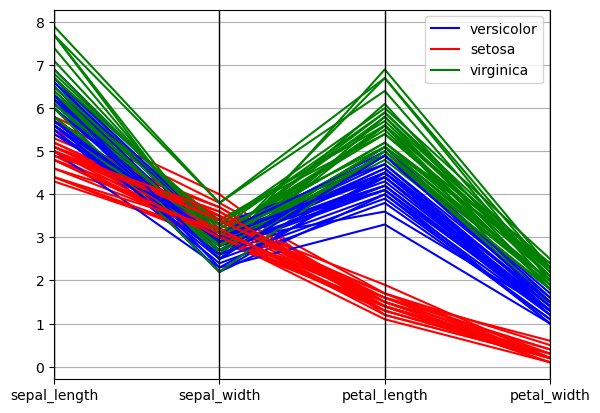

In [16]:
#Coordenadas paralelas
pd.plotting.parallel_coordinates(train, 'species', color=['blue','red','green']);

In [17]:
##Árbol de decisión(Clasificación)

In [18]:
### Separación de la etiqueta de clase y atributos

In [19]:
# Separacion objetiva - explicativas de cada grupo
#Grupo de entrenamiento
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
Y_train = train['species']
#Grupo de pruebas
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
Y_test = test['species']
print(X_train.head(5))
print(Y_train.head(5))

     sepal_length  sepal_width  petal_length  petal_width
68            6.2          2.2           4.5          1.5
0             5.1          3.5           1.4          0.2
27            5.2          3.5           1.5          0.2
8             4.4          2.9           1.4          0.2
108           6.7          2.5           5.8          1.8
68     versicolor
0          setosa
27         setosa
8          setosa
108     virginica
Name: species, dtype: object


In [20]:
#Bibliotecas especificas 
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [21]:
# Creación del modelo del Árbol de decisión
mod_dt = DecisionTreeClassifier(max_depth=3, random_state=1)
mod_dt.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=3, random_state=1)

In [22]:
###Visualizacion

In [23]:
plt.figure(figsize=(10,8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

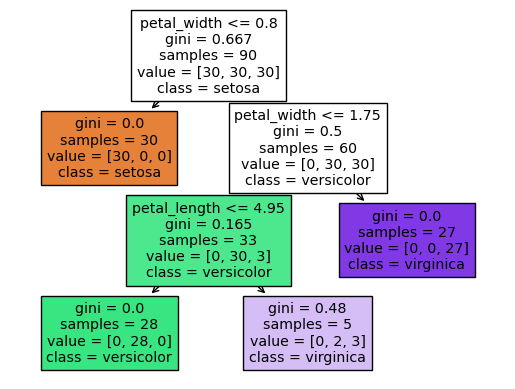

In [24]:
plot_tree(mod_dt, feature_names = list(mod_dt.feature_names_in_), class_names=cn, filled=True);

#Verificación del modelo

# Predecir resultados utilizando el modelo


In [25]:
prediccion = mod_dt.predict(X_test)

In [26]:
#Modulo para metricas de eficiencia del modelo
from sklearn import metrics


In [27]:
print('La precision del arol de decisione es: {:.3f}'.format(metrics.accuracy_score(prediccion,Y_test)))

La precision del arol de decisione es: 0.967


In [29]:
#Importancia de cada predictor
mod_dt.feature_importances_

array([0.       , 0.       , 0.0530303, 0.9469697])

In [30]:
mod_dt.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [33]:
importancia_dt=pd.DataFrame({'Caracteristica':mod_dt.feature_names_in_, 'Importancia': mod_dt.feature_importances_})
importancia_dt

,Caracteristica,Importancia
0,sepal_length,0.00000
1,sepal_width,0.00000
2,petal_length,0.05303
3,petal_width,0.94697
